# Exercise 1 / Q10

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
import pandas as pd
Carseats = pd.read_csv('Carseats.csv')

Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## (a)

>Sales = $B_0$ + $B_1$(Price) + $B_2$(Urban) + $B_3$(US)

In [10]:
df = Carseats

df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})
df['US'] = df['US'].map({'Yes': 1, 'No': 0})

X = df[['Price', 'Urban', 'US']]
y = df['Sales']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# (b)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        11:33:22   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (c)

> $Y= \beta_0 + X_1 \beta_1 + X_2 \beta_2  + X_3 \beta_3$


>$\textbf{Sales} = 13.04 - 0.05(Price) - 0.02(Urban) + 1.2(US | {"Yes"=1; "No"=2;})$

# (d)

> The null hypothesis can be rejected given the p calue is highly significant 

# (e)

In [35]:
y = df['Sales']
X = df[['Price', 'US']]
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        11:48:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

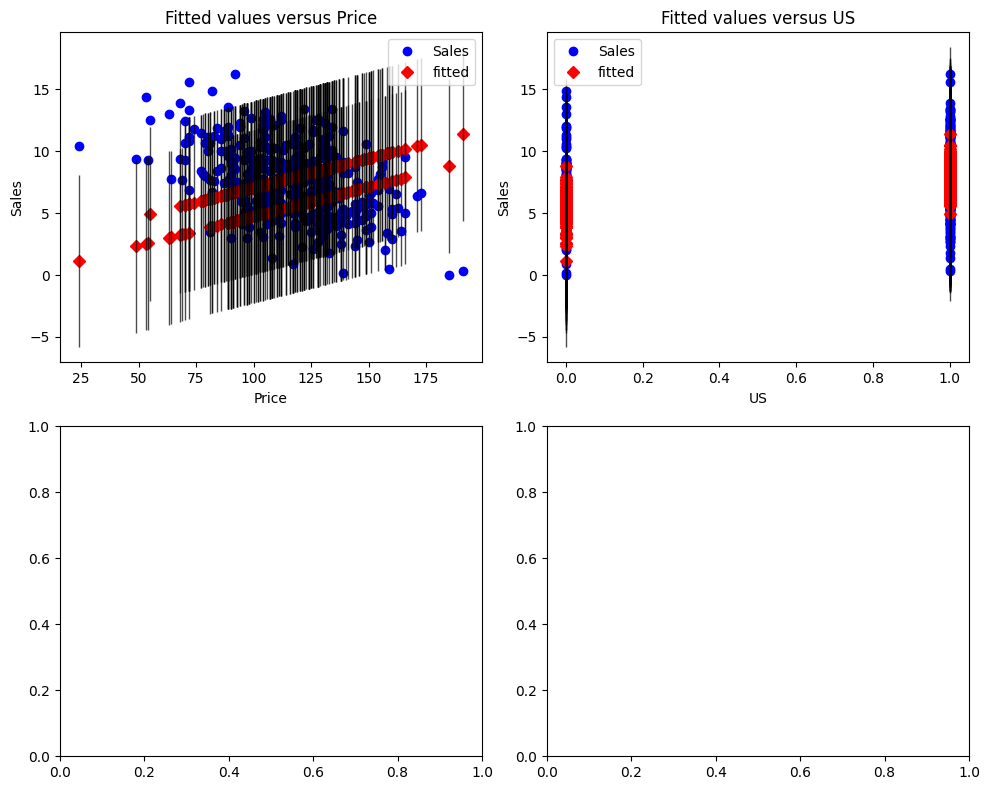

In [31]:
fig, axis = plt.subplots(2,2,figsize=(10,8))
sm.graphics.plot_fit(model2, 'Price', ax=axis[0,0])
sm.graphics.plot_fit(model2, 'US', ax=axis[0,1])
plt.tight_layout()
plt.show()

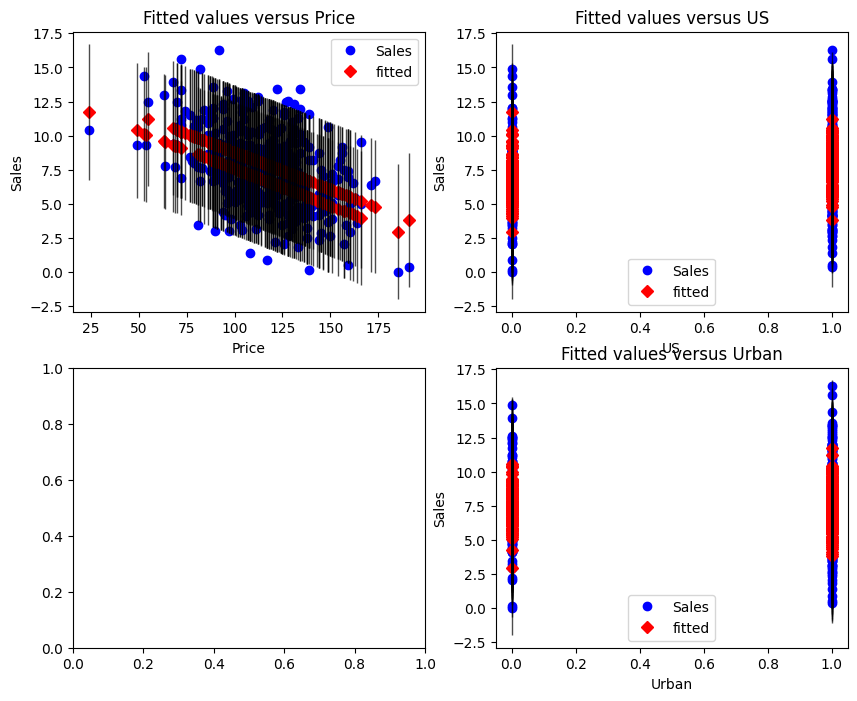

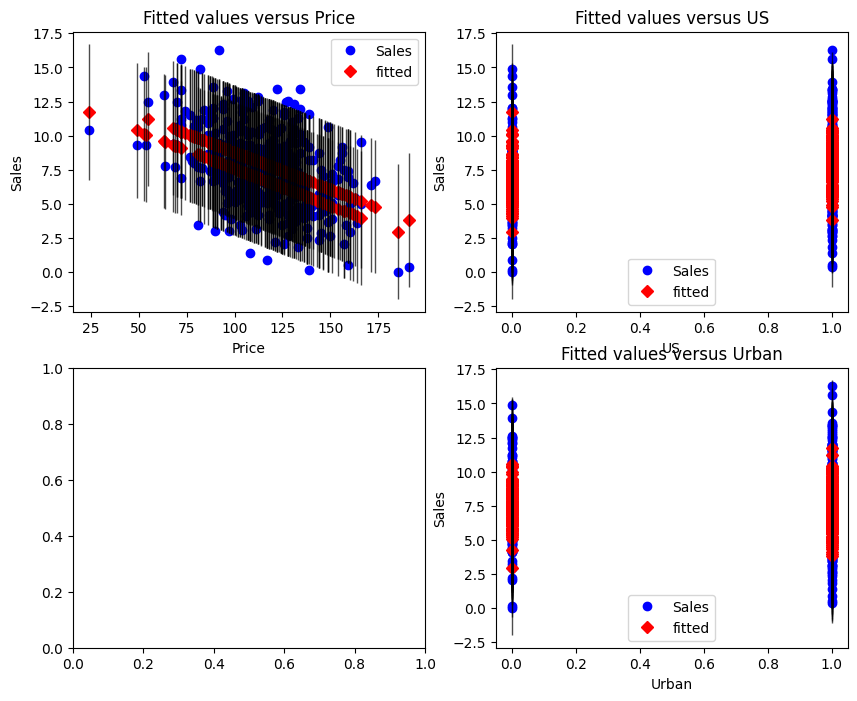

In [29]:
fig, axis = plt.subplots(2,2,figsize=(10,8))
sm.graphics.plot_fit(model, 'Price', ax=axis[0,0])
sm.graphics.plot_fit(model, 'US', ax=axis[0,1])
sm.graphics.plot_fit(model, 'Urban', ax=axis[1,1])

# (f)

> Both model and model2 have an $R^2$ of .239, meaning the model only accounts for 23.9% of the variance in the data. Neither model fits the data well. 

# (g)

In [36]:
model2.conf_int(alpha=0.05)

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


# Exercise 2 / Q15

# (a)